# [2.X코드반영] Lab 05-3: Logistic Regression/Classification 를 TensorFlow로 구현하기

In [2]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.random.set_seed(777)  # for reproducibility
print(tf.__version__)

2.4.1


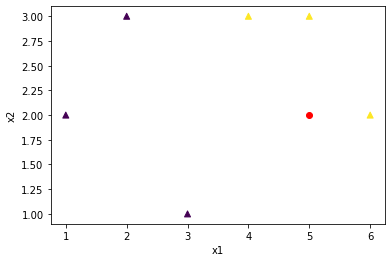

In [6]:
# 학습 데이터
x_train = [[1., 2.],
          [2., 3.],
          [3., 1.],
          [4., 3.],
          [5., 3.],
          [6., 2.]]
y_train = [[0.],
          [0.],
          [0.],
          [1.],
          [1.],
          [1.]]

# 검증 데이터
x_test = [[5.,2.]]
y_test = [[1.]]

x1 = [x[0] for x in x_train] # 1,2,3 ...
x2 = [x[1] for x in x_train] # 2,3,1 ...

colors = [int(y[0]%3) for y in y_train]
plt.scatter(x1, x2, c=colors, marker='^')
plt.scatter(x_test[0][0], x_test[0][1], c='red')

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

가설 : 시그모이드 함수

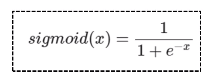

손실 함수

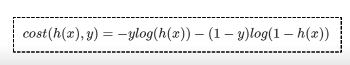

In [20]:
dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train))

W = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

# 시그모이드 함수를 가설로 선언
def logistic_regression(features):
  hypothesis = tf.divide(1., 1.+tf.exp(-tf.matmul(features, W)+b))
  return hypothesis

# 손실 함수 정의
def loss_fn(hypothesis, labels):
  cost = -tf.reduce_mean(labels*tf.math.log(hypothesis) + (1-labels)*tf.math.log(1-hypothesis))
  return cost

# 옵티마이저로 cost 값 줄이기
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

def accurary_fn(hypothesis, labels):
  # 조건과 리턴 값 : hypothesis > 0.5 = 1, hypothesis < 0.5 = 0
  predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
  accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
  return accuracy

def grad(features, labels):
  # tape 함수를 이용해 각각의 미분 값 기록
  with tf.GradientTape() as tape:
    hypothesis = logistic_regression(features)
    loss_value = loss_fn(hypothesis, labels)
  return tape.gradient(loss_value, [W,b])

EPOCHS = 1001
for step in range(EPOCHS):
  # 전체 데이터 학습
  for features, labels in iter(dataset.batch(len(x_train))):
    hypothesis = logistic_regression(features)
    # 미분값 반환
    grads = grad(features, labels)
    # 옵티마이저가 학습률만큼 스텝별로 계산한다.
    optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
    if step % 100 == 0:
      print('Iter: {}, Loss: {:4f}'.format(step, loss_fn(hypothesis, labels)))

test_acc = accurary_fn(logistic_regression(x_test),y_test)
print('Test result = {}'.format(tf.cast(logistic_regression(x_test)>0.5, dtype=tf.int32)))
print('Testset accurary: {:.4f}'.format(test_acc))

Iter: 0, Loss: 0.693147
Iter: 100, Loss: 0.578086
Iter: 200, Loss: 0.535207
Iter: 300, Loss: 0.505647
Iter: 400, Loss: 0.484024
Iter: 500, Loss: 0.467288
Iter: 600, Loss: 0.453674
Iter: 700, Loss: 0.442127
Iter: 800, Loss: 0.431998
Iter: 900, Loss: 0.422874
Iter: 1000, Loss: 0.414490
Test result = [[1]]
Testset accurary: 1.0000


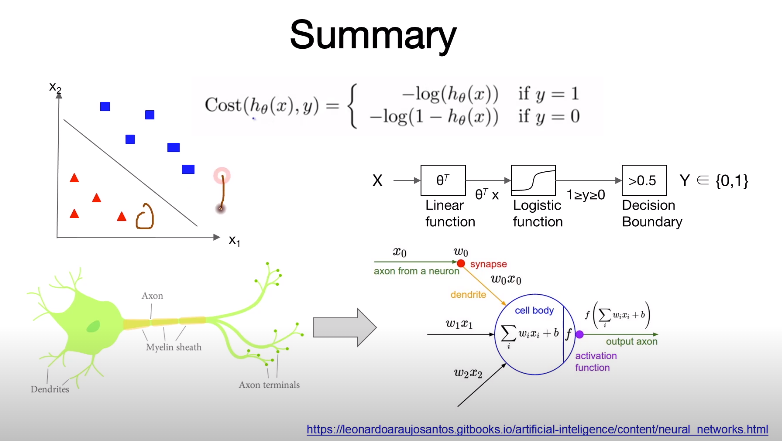